In [2]:
import pandas as pd

file = pd.read_csv("../datasets/Stars.csv")
stars_df = pd.DataFrame(file)

stars_df.sample(n=7)

,Temperature,Luminosity,Radius,Abs_magnitude,Color,Spectral_Class,Type
103,17120,235000.000000,83.00000,-6.89,Blue,O,4
32,15276,1136.000000,7.20000,-1.97,Blue-white,B,3
171,3500,138000.000000,1420.00000,-8.18,Red,M,5
25,12990,0.000085,0.00984,12.23,Yellowish White,F,2
80,7100,0.000290,0.01200,14.09,White-Yellow,F,2
8,2650,0.000690,0.11000,17.45,Red,M,0
214,34190,198200.000000,6.39000,-4.57,Blue,O,3


Find the range in temperature of all the stars in our mini-catalogue.

As an extra challenge: try to find the range for each colour of star.

In [3]:
temperature_range = stars_df['Temperature'].max() - stars_df['Temperature'].min()

print("Temperature range =",temperature_range)

unique_colours = stars_df.drop_duplicates(subset='Color')

display(unique_colours['Color'])
print("The range of colors is:", unique_colours['Color'].count())

Temperature range = 38061


0                    Red
20            Blue-white
21                 White
25       Yellowish White
29    Pale yellow orange
30                  Blue
33               Whitish
34          yellow-white
53                Orange
80          White-Yellow
91             Yellowish
96            Orange-Red
Name: Color, dtype: object

The range of colors is: 12


Make a frequency table to show how many stars of each colour there are in the Stars.csv collection we previously looked at. Sort the results so the most common colour is at the top.

In [4]:
colours = unique_colours['Color']

colours_dict = {}

for colour in colours:
    colours_dict[colour] = stars_df.loc[stars_df['Color'] == colour]['Color'].count()

colours_data = {
    'Colour': colours_dict.keys(),
    'Frequency': colours_dict.values()
}

colour_freq_df = pd.DataFrame(colours_data)
colour_freq_df.sort_values(by=['Frequency'], ascending=False, inplace=True)

display(colour_freq_df)

,Colour,Frequency
0,Red,112
5,Blue,56
1,Blue-white,41
2,White,10
7,yellow-white,8
3,Yellowish White,3
10,Yellowish,3
6,Whitish,2
8,Orange,2
4,Pale yellow orange,1


#### A more succinct way of sorting by colour:

In [5]:
stars_df.groupby("Color").size().reset_index(name="frequency").sort_values(by="frequency", ascending=False)

,Color,frequency
5,Red,112
0,Blue,56
1,Blue-white,41
6,White,10
11,yellow-white,8
9,Yellowish,3
10,Yellowish White,3
2,Orange,2
8,Whitish,2
3,Orange-Red,1


Try to recreate the colour coded version of the scatter graph.

Hint: You will need to plot the data for each spectral class separately.

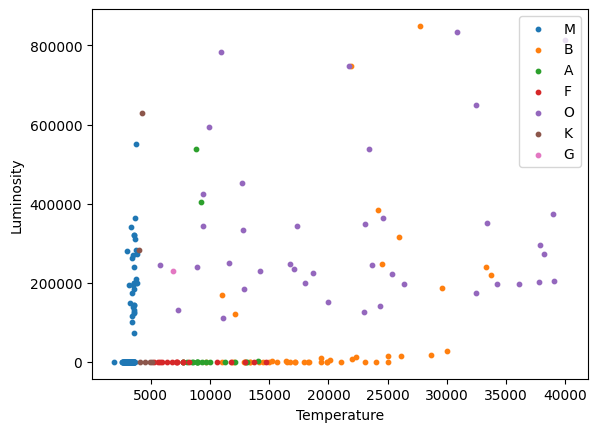

In [6]:
import matplotlib.pyplot as plt

spectral_classes = stars_df.drop_duplicates(subset='Spectral_Class')['Spectral_Class']

for spectral_class in spectral_classes:
    dataset = stars_df.loc[stars_df['Spectral_Class'] == spectral_class]
    plt.scatter(dataset['Temperature'], dataset['Luminosity'], label=spectral_class, s=10)


plt.xlabel('Temperature')
plt.ylabel('Luminosity')
plt.legend()

plt.show()

## Mean, Median & Mode

Group our stars collection by colour, and find the mean temperature of each colour (rounded to 1 decimal place). Sort the results and display in a table. Use pandas this time.

In [7]:
# Mean

stars_df.groupby("Color")['Temperature'].mean().reset_index(name='mean temperature').sort_values(by='mean temperature', ascending=False).round(1)

,Color,mean temperature
0,Blue,21918.3
1,Blue-white,16660.0
10,Yellowish White,10826.7
6,White,9720.3
8,Whitish,8876.0
4,Pale yellow orange,7230.0
7,White-Yellow,7100.0
11,yellow-white,6466.2
3,Orange-Red,5112.0
9,Yellowish,4527.7


In [8]:
# Median

stars_df.groupby("Color")['Temperature'].median().reset_index(name='median temperature').sort_values(by='median temperature', ascending=False).round(1)

,Color,median temperature
0,Blue,19921.5
1,Blue-white,14100.0
10,Yellowish White,11790.0
6,White,8879.5
8,Whitish,8876.0
4,Pale yellow orange,7230.0
7,White-Yellow,7100.0
11,yellow-white,6158.0
3,Orange-Red,5112.0
9,Yellowish,4526.0


In [9]:
# Multi-modalness, or "no mode"

import pandas as pd
s = pd.Series([1, 1, 2, 2, 3, 3, 4, 4, 5, 5])
s.mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [10]:
s = pd.Series([2, 4, 4, 4, 6])

range = s.max() - s.min()
mode = s.mode()
median = s.median()
mean = s.mean()

print(range)
print(mode[0])
print(median)
print(mean)

4
4
4.0
4.0
